In [2]:
import pandas as pd
import pickle

In [3]:
with open('rtr_reviews_uncleaned.pkl', 'rb') as f:
    data = pickle.load(f)

customers = data[['user_id', 'weight', 'body type', 'height', 'size', 'age','band_size', 'cup_size']]

customers = customers.drop_duplicates(subset='user_id')

customers_complete = customers.dropna()

In [9]:
customers_complete

,user_id,weight,body type,height,size,age,band_size,cup_size
0,420272,137.0,hourglass,68,14,28,34,d
1,273551,132.0,straight & narrow,66,12,36,34,b
3,909926,135.0,pear,65,8,34,34,c
4,151944,145.0,athletic,69,12,27,34,b
5,734848,138.0,athletic,68,8,45,32,b
...,...,...,...,...,...,...,...,...
192339,597756,220.0,full bust,64,35,32,38,dd
192343,838239,150.0,hourglass,60,24,55,36,c
192347,442241,127.0,full bust,65,8,33,34,d
192353,961120,165.0,pear,66,16,31,36,c


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

Estimated number of clusters: 5
Estimated number of noise points: 1183


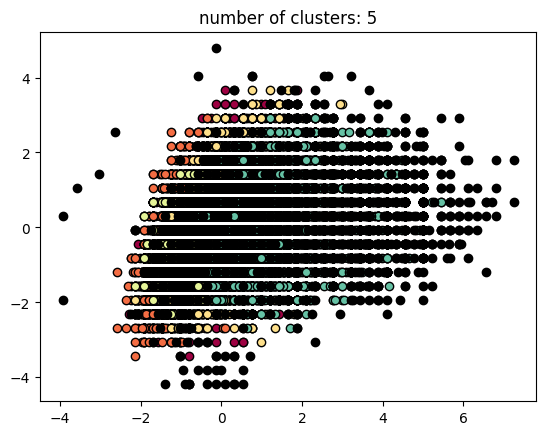

In [14]:
df = customers_complete[['weight', 'height', 'size', 'age','band_size']]
df = StandardScaler().fit_transform(df)
db = DBSCAN(eps=1, min_samples=50).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
 
# Plot result
print("Estimated number of clusters: %d" % n_clusters_)
# Black removed and is used for noise instead.
unique_labels = set(labels)
#colors = ['y', 'b', 'g', 'r']
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
#print(colors)
for k, col in zip(unique_labels, colors):
    #print("this",k)
    if k == -1:
        # Black used for noise.
        col = [0,0,0,1]
 
    class_member_mask = (labels == k)
 
    xy = df[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:,1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
    #print(xy)
 
    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0], xy[:,1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
plt.show()